In [36]:
import pandas as pd
tv_sales= pd.read_csv('tvmarketing.csv')
ds=pd.DataFrame(tv_sales)

In [37]:
#1. Import dataset and display first 5 rows
print(ds.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [38]:
#2. Check column data types
print(ds.dtypes)

TV       float64
Sales    float64
dtype: object


In [43]:
#3. Check the shape of the Data Frame (rows, columns)

print(ds.shape)
print('rows:',ds.shape[0])
print('Columns:',ds.shape[1])

(200, 2)
rows: 200
Columns: 2


In [24]:
#4 Get summary statistics
print(ds.describe())


               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


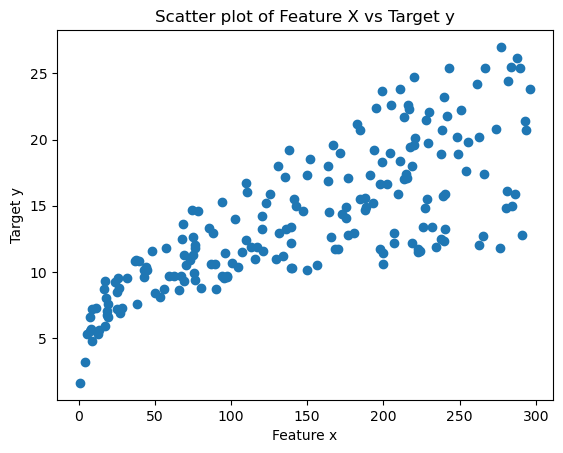

In [25]:
import matplotlib.pyplot as plt

#5 Scatter plot between feature 'X' and target 'y'
X=ds['TV']
y=ds['Sales']
plt.scatter(X,y)
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.title('Scatter plot of Feature X vs Target y')
plt.show()


In [26]:
# 6.Assuming 'y' is the target variable and the rest are features
X = ds['TV']
y = ds['Sales']



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [28]:
# 8. Print the shape of train and test data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (140,) (140,)
Testing data shape: (60,) (60,)


In [29]:
# 9. Perform Linear Regression manually (without sklearn)
n = len(X_train)
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

num = sum((X_train - x_mean) * (y_train - y_mean))
den = sum((X_train - x_mean) ** 2)
b1 = num / den  # Slope
b0 = y_mean - b1 * x_mean  # Intercept
print("Manual Linear Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)

Manual Linear Regression Coefficients:
Intercept (b0): 7.239459830751138
Slope (b1): 0.046407802128152764


In [30]:
# 10. Make predictions using manual model
y_pred_manual = b0 + b1 * X_test

In [31]:
print(type(X_train))  # Should be a DataFrame or 2D NumPy array
print(type(y_train))  # Should be a Series or 1D NumPy array
print(X_train.shape)  # Should be (rows, 1), NOT (rows,)
print(y_train.shape)  # Should be (rows,)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(140,)
(140,)


In [32]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(X_train.shape)  # Should be (rows, 1), NOT (rows,)
print(X_test.shape) 

(140, 1)
(60, 1)


In [33]:
# 11. Perform Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# 12. Print intercept and coefficients
print("Sklearn Model Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Sklearn Model Coefficients:
Intercept: 7.239459830751147
Coefficient: 0.04640780212815271


In [139]:
# 13. Make predictions on the test set
y_pred = model.predict(X_test)

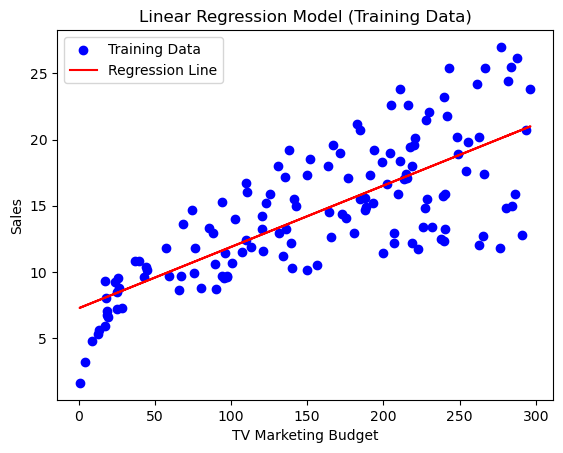

In [35]:
# 14. Plot train data and the model
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Model (Training Data)')
plt.legend()
plt.show()

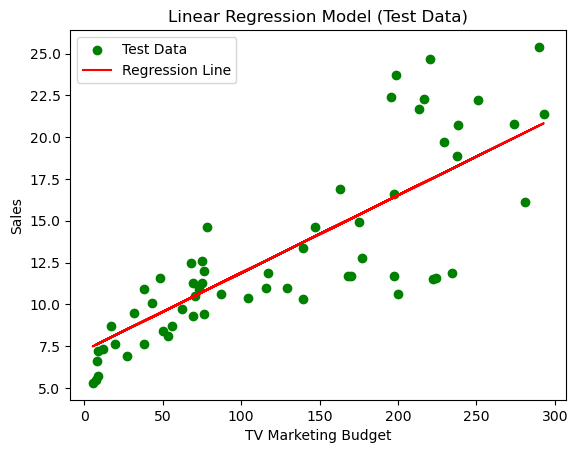

In [141]:
# 15. Plot test data and the model
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Model (Test Data)')
plt.legend()
plt.show()

In [142]:
# 16. Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R Squared Value:", r2)

Mean Squared Error: 8.970991242413616
R Squared Value: 0.6714477229302764


In [143]:
# 17. Calculate R Squared and Adjusted R Squared manually
ss_total = sum((y_test - y_mean) ** 2)
ss_residual = sum((y_test - y_pred_manual) ** 2)
r2_manual = 1 - (ss_residual / ss_total)
n_test = len(y_test)
k = 1  # Number of independent variables
adj_r2_manual = 1 - ((1 - r2_manual) * (n_test - 1) / (n_test - k - 1))
print("Manual R Squared Value:", r2_manual)
print("Manual Adjusted R Squared Value:", adj_r2_manual)

Manual R Squared Value: 0.699038642525352
Manual Adjusted R Squared Value: 0.6938496536033754
